<a href="https://colab.research.google.com/github/Dechrist2021/Mulomba/blob/main/Github_Resilience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from datetime import datetime
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge

In [ ]:
from google.colab import files
files.upload()

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


{'GlobalWeatherRepository.csv': b"country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination\nAfghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,7.2,11.5,74,ENE,1004.0,29.64,0.0,0.0,19,0,26.7,80.1,10.0,6.0,7.0,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93\nAlbania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,3.8,6.1,210,SSW,1006.0,29.71,0.

In [ ]:
df = pd.read_csv('GlobalWeatherRepository.csv')
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,12275.000000,12275.000000,1.227500e+04,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,...,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000
mean,19.304679,21.908951,1.695940e+09,21.702786,71.065230,6.704530,10.791373,162.403992,1013.468921,29.926833,...,17.212798,554.897270,40.902468,11.934061,6.708228,23.858395,39.586444,1.557312,2.273401,50.578004
std,24.582445,65.669684,1.565834e+06,7.466819,13.440889,4.807452,7.737756,104.560706,6.271743,0.185035,...,11.043709,1389.301335,32.303866,20.988958,14.730435,66.466976,95.539521,0.990933,2.413814,36.210463
min,-41.300000,-175.200000,1.693301e+09,-9.000000,15.800000,2.200000,3.600000,1.000000,975.000000,28.790000,...,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.694559e+09,16.600000,61.900000,3.100000,5.000000,70.000000,1010.000000,29.830000,...,9.100000,227.000000,17.300000,1.200000,0.500000,3.000000,5.400000,1.000000,1.000000,14.000000
50%,17.250000,23.240000,1.695940e+09,23.000000,73.400000,5.600000,9.000000,155.000000,1013.000000,29.910000,...,15.100000,280.400000,36.800000,4.200000,1.600000,8.000000,13.600000,1.000000,1.000000,49.000000
75%,41.330000,50.580000,1.697317e+09,27.000000,80.600000,9.400000,15.100000,242.000000,1017.000000,30.030000,...,22.800000,440.600000,57.900000,12.900000,5.800000,21.400000,35.000000,2.000000,2.000000,89.000000
max,63.830000,179.220000,1.698699e+09,45.000000,113.000000,87.700000,141.100000,360.000000,1036.000000,30.590000,...,110.500000,36315.898000,320.400000,329.000000,263.200000,1558.800000,2504.300000,6.000000,10.000000,100.000000


**“Air Quality Projections: An Insight from Explainable Machine Learning Techniques”**: Given the real-time nature of the data, machine learning can be used to predict short-term changes in the Air Quality Index based on parameters like 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', etc. This can be crucial in issuing timely health advisories during events like wildfires or industrial accidents.

The features you listed can be grouped into three main categories:

1. **Meteorological Features**: These are features related to weather conditions.
    - 'temperature_celsius'
    - 'wind_mph'
    - 'wind_degree'
    - 'wind_direction'
    - 'pressure_mb'
    - 'precip_mm'
    - 'humidity'
    - 'cloud'
    - 'feels_like_celsius'
    - 'visibility_km'
    - 'uv_index'
    - 'gust_mph'

2. **Air Quality Index Features**: These are features related to the air quality index.
    - 'air_quality_gb-defra-index'

3. **Air Pollutant Features**: These are features related to specific air pollutants.
    - 'air_quality_Carbon_Monoxide'
    - 'air_quality_Ozone'
    - 'air_quality_Nitrogen_dioxide'
    - 'air_quality_Sulphur_dioxide'
    - 'air_quality_PM2.5'
    - 'air_quality_PM10'

Each of these groups provides different types of information that can be useful in various contexts, such as weather forecasting, air quality monitoring, and environmental research.

In [ ]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [ ]:
# Changing data type
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Extract the date part
df['last_updated'] = df['last_updated'].dt.date

# Selecting features
data = df[['country','location_name','last_updated', 'temperature_celsius','wind_mph','wind_degree', 'wind_direction',
           'pressure_mb','precip_mm','humidity', 'cloud', 'feels_like_celsius','visibility_km','uv_index', 'gust_mph',
           'air_quality_Carbon_Monoxide','air_quality_Ozone','air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide',
           'air_quality_PM2.5', 'air_quality_PM10','air_quality_gb-defra-index']]
data = data.set_index('last_updated')

0        2023-08-29
1        2023-08-29
2        2023-08-29
3        2023-08-29
4        2023-08-29
            ...    
12270    2023-10-29
12271    2023-10-29
12272    2023-10-29
12273    2023-10-31
12274    2023-10-30
Name: last_updated, Length: 12275, dtype: object

Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Selecting important columns
columns = df[['country', 'location_name','temperature_celsius','condition_text', 'wind_mph', 'wind_kph','wind_degree','wind_direction', 'pressure_mb', 'pressure_in','precip_mm', 'precip_in', 'humidity', 'cloud',
                'feels_like_celsius','visibility_km','visibility_miles','uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide','air_quality_Ozone', 'air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide', 'air_quality_PM2.5',
                'air_quality_PM10','air_quality_us-epa-index','sunrise', 'sunset', 'moonrise','moonset', 'moon_phase','moon_illumination']]


# Labeling objects

le = LabelEncoder()
object_cols = columns.select_dtypes(include=['object']).columns

for col in object_cols:
  columns[col] = le.fit_transform(columns[col])

<ipython-input-9-9517b2b7c783>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[col] = le.fit_transform(columns[col])
<ipython-input-9-9517b2b7c783>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[col] = le.fit_transform(columns[col])
<ipython-input-9-9517b2b7c783>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

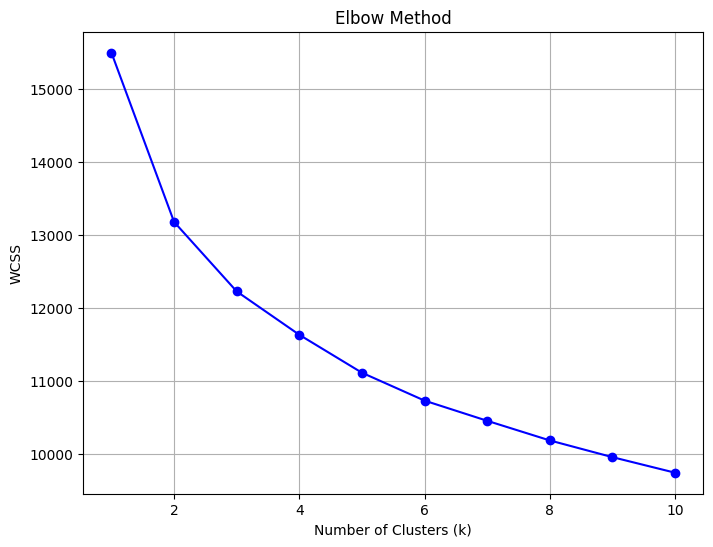

In [ ]:
# Scaling values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(columns)
scaled_df = pd.DataFrame(scaled, columns=columns.columns)

# WCSS (Within-Cluster-Sum-of-Squares) for different values of k
wcss = []
for k in range(1, 11):  # Try different values of k (number of clusters)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
# Number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)

# Fit the model to the data and predict the cluster assignments
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster assignments to your original DataFrame
data['Cluster'] = clusters

data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,country,location_name,temperature_celsius,wind_mph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,...,uv_index,gust_mph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_gb-defra-index,Cluster
last_updated,,,,,,,,,,,,,,,,,,,,,
2023-08-29,Afghanistan,Kabul,28.8,7.2,74,ENE,1004.0,0.00,19,0,...,7.0,8.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1
2023-08-29,Albania,Tirana,27.0,3.8,210,SSW,1006.0,0.00,54,75,...,6.0,7.4,433.9,104.4,3.6,1.8,28.2,29.6,3,1
2023-08-29,Algeria,Algiers,28.0,8.1,240,WSW,1014.0,0.00,30,25,...,7.0,3.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1
2023-08-29,Andorra,Andorra La Vella,10.2,6.0,345,NNW,1015.0,0.00,51,6,...,4.0,7.4,190.3,68.0,0.2,0.2,0.5,0.8,1,1
2023-08-29,Angola,Luanda,25.0,2.2,270,W,1016.0,0.00,69,75,...,6.0,3.6,2136.2,147.3,52.8,26.9,139.6,203.3,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-29,Yemen,Sanaa,16.9,6.9,74,ENE,1017.0,0.02,60,70,...,1.0,8.0,183.6,61.5,1.3,2.9,7.7,29.9,1,1
2023-10-29,Zambia,Lusaka,26.6,5.8,6,N,1010.0,0.00,43,30,...,1.0,8.1,1161.6,54.4,6.2,5.3,22.0,33.4,2,1
2023-10-29,Zimbabwe,Harare,23.3,11.9,102,ESE,1013.0,0.00,42,8,...,1.0,16.7,487.3,37.6,5.4,7.0,17.5,22.6,2,0


In [ ]:
# Storing data by clusters
first_cluster = data[data['Cluster'] == 0]
second_cluster = data[data['Cluster'] == 1]

In [ ]:
first_cluster['country']

last_updated
2023-08-29               Argentina
2023-08-29               Australia
2023-08-29                 Bahamas
2023-08-29                 Bolivia
2023-08-29                  Brazil
                      ...         
2023-10-30            Turkmenistan
2023-10-29                 Ukraine
2023-10-30    United Arab Emirates
2023-10-30                 Vietnam
2023-10-29                Zimbabwe
Name: country, Length: 4689, dtype: object

In [ ]:
first_cluster.describe()

,temperature_celsius,wind_mph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_mph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_gb-defra-index,Cluster
count,4689.000000,4689.00000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.0
mean,19.776541,5.63393,160.236938,1015.101727,0.020034,64.714865,3.038174,20.268479,9.573640,1.027511,10.220111,577.356237,42.917466,16.391448,7.765430,31.500405,54.814758,2.779057,0.0
std,7.501610,3.83161,107.950573,6.350682,0.218395,22.219429,8.600715,8.763796,1.466484,0.358779,5.928397,1571.794307,33.879689,24.476126,16.231828,75.464143,106.910560,2.627918,0.0
min,-9.000000,2.20000,1.000000,981.000000,0.000000,4.000000,0.000000,-13.400000,0.000000,1.000000,0.000000,138.500000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,0.0
25%,15.000000,2.50000,66.000000,1011.000000,0.000000,49.000000,0.000000,14.800000,10.000000,1.000000,5.700000,233.700000,17.500000,2.300000,0.700000,6.300000,9.800000,1.000000,0.0
50%,19.800000,4.30000,150.000000,1015.000000,0.000000,69.000000,0.000000,19.800000,10.000000,1.000000,9.200000,283.700000,40.100000,7.000000,2.200000,14.600000,22.800000,2.000000,0.0
75%,25.000000,6.90000,250.000000,1020.000000,0.000000,82.000000,0.000000,26.000000,10.000000,1.000000,13.600000,454.000000,60.800000,19.900000,6.600000,31.200000,60.200000,3.000000,0.0
max,41.000000,40.50000,360.000000,1032.000000,10.000000,100.000000,83.000000,51.900000,24.000000,8.000000,46.200000,33752.398000,246.100000,219.400000,263.200000,1253.900000,1930.600000,10.000000,0.0


In [ ]:
second_cluster.describe()

,temperature_celsius,wind_mph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_mph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_gb-defra-index,Cluster
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.0
mean,22.893422,7.366280,163.743475,1012.459663,0.258994,77.107567,52.603480,25.154970,9.853071,2.991300,10.988940,541.015107,39.656973,9.178895,6.054759,19.134775,30.173636,1.960849,1.0
std,7.192170,5.213309,102.393566,6.004768,1.033008,17.560376,27.376506,9.920892,3.008015,2.583029,7.366133,1263.297398,31.227488,17.964681,13.680817,59.755934,86.453514,2.214573,0.0
min,-7.000000,2.200000,1.000000,975.000000,0.000000,6.000000,0.000000,-12.200000,0.000000,1.000000,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.0
25%,18.000000,3.800000,80.000000,1010.000000,0.000000,70.000000,25.000000,18.000000,10.000000,1.000000,5.600000,220.300000,17.000000,0.800000,0.400000,2.200000,3.900000,1.000000,1.0
50%,25.000000,5.600000,160.000000,1012.000000,0.000000,80.000000,50.000000,26.700000,10.000000,1.000000,9.500000,277.000000,35.400000,3.000000,1.400000,5.300000,9.700000,1.000000,1.0
75%,28.000000,10.300000,240.000000,1015.000000,0.100000,89.000000,75.000000,31.600000,10.000000,6.000000,14.500000,433.900000,55.800000,8.800000,5.300000,14.800000,23.900000,2.000000,1.0
max,45.000000,87.700000,360.000000,1036.000000,31.000000,100.000000,100.000000,73.600000,32.000000,10.000000,68.700000,36315.898000,320.400000,329.000000,194.600000,1558.800000,2504.300000,10.000000,1.0


In [ ]:
# Number of country in each cluster
print('Number of country in cluster 1:',len(first_cluster['location_name'].unique()))
print('Number of country in cluster 2:',len(second_cluster['location_name'].unique()))

Number of country in cluster 1: 166
Number of country in cluster 2: 197


In [ ]:
first_cluster['location_name'].unique()

array(['Buenos Aires', 'Canberra', 'Nassau', 'Sucre', 'Bras', 'Ottawa',
       'Santiago', 'San Juan', 'Quito', 'Port-Au-Prince', 'Riga',
       'Wellington', 'National', 'Port Moresby', 'Basseterre',
       'Washington Park', 'Montevideo', 'Vienna', 'Minsk', 'Gaborone',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Brazzaville', 'Kinshasa',
       'Cairo', 'Asmara', 'Mbabane', 'Berlin', 'Budapest', 'Amman',
       'Maseru', 'Lilongwe', 'Valletta', 'Windhoek', 'Yaren', 'Niamey',
       'Belgrade', 'Pretoria', 'Madrid', 'Damascus', 'Ankara', 'Lusaka',
       'Harare', 'Kabul', 'Yerevan', 'Baku', 'Manama', 'Brussels',
       'Sarajevo', 'Bangui', "N'djamena", 'Bogot', 'Moroni', 'Nicosia',
       'Copenhagen', 'Djibouti', 'Tbilisi', 'Athens', 'New Delhi',
       'Baghdad', 'Jerusalem', 'Astana', 'Kuwait City', 'Luxembourg',
       'Monaco', 'Maputo', 'Islamabad', 'Carreria', 'Doha', 'Moscow',
       'San Marino', "'S-Gravenwezel", 'Riyadh', 'Bratislava',
       'Stockholm', 'Dodoma', 'Ashg

In [ ]:
second_cluster['location_name'].unique()

array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Yerevan', 'Vienna', 'Baku', 'Manama', 'Dhaka',
       'Bridgetown', 'Minsk', 'Brussels', 'Belmopan', 'Porto-Novo',
       'Thimphu', 'Sarajevo', 'Gaborone', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Bafoussam', 'Bangui', "N'djamena", 'Beijing', 'Bogot', 'Moroni',
       'Brazzaville', 'Zagreb', 'Havana', 'Nicosia', 'Prague', 'Kinshasa',
       'Copenhagen', 'Djibouti', 'Roseau', 'Santo Domingo', 'Cairo',
       'San Salvador', 'Malabo', 'Asmara', 'Tallinn', 'Mbabane',
       'Addis Ababa', 'Suva', 'Helsinki', 'Paris', 'Libreville', 'Banjul',
       'Tbilisi', 'Berlin', 'Accra', 'Athens', "Saint George's",
       'Guatemala City', 'Conakry', 'Bissau', 'Georgetown',
       'Vatican City', 'Tegucigalpa', 'Budapest', 'Hella', 'New Delhi',
       'Jakarta', 'Tehran', 'Baghdad', 'Dublin', 'Jerusalem', 'Rome',
       'Norman Gardens', 'Tok

In [ ]:
# Air quality by cluster
print('AQI in first cluster:',first_cluster['air_quality_gb-defra-index'].unique())
print('AQI in second cluster:',second_cluster['air_quality_gb-defra-index'].unique())

AQI in first cluster: [ 1 10  5  2  6  3  4  8  7  9]
AQI in second cluster: [ 1  3 10  2  9  4  5  8  7  6]


The difference between the two clusters:
* The mean values of the meteorological and AQI index are higher in the second cluster compared to the first
* The air polluant features are lower in the in the second cluster compared to the first

For the difference cluster (countries presents in the second cluster but not in the first), the meteorological conditions are quite higher as in the two other clusters, however the air polluant are very low.



Based on the differences, The higher mean values of meteorological indices in the second cluster suggest that this cluster might represent days with more extreme weather conditions compared to the first cluster. This could include higher temperatures, stronger winds, more precipitation, etc.

The lower air pollutant features in the second cluster indicate better air quality compared to the first cluster. This could suggest that the second cluster represents days with cleaner air, possibly due to factors like less industrial activity, fewer vehicle emissions, more effective pollution control measures, etc.

There is no direct correlation between meteorological conditions and air quality

In [ ]:
# Countries presents in cluster 2 but not in 1
diff_countries = second_cluster[~second_cluster['location_name'].isin(first_cluster['location_name'])]
print(diff_countries['location_name'].unique())
print('Total number:',len(diff_countries['location_name'].unique()))

["Saint John's" 'Bridgetown' 'Belmopan' 'Bandar Seri Begawan' 'Phnom Penh'
 'Havana' 'Roseau' 'Santo Domingo' 'San Salvador' 'Suva' 'Guatemala City'
 'Tegucigalpa' 'Norman Gardens' 'Nan' 'Antananarivo' 'Majuro'
 'Mexico City' 'Palikir' 'Kathmandu' 'Managua' 'Adkip' 'Panama City'
 'Lima' 'Kigali' 'Apia' 'Honiara' 'Murong Timor' 'Nuku`Aloia'
 'Port Of Spain' 'Funafuti' 'Port Vila']
Total number: 31


In [ ]:
unique_values = diff_countries[['country', 'location_name']].drop_duplicates()
unique_values

,country,location_name
last_updated,,
2023-08-29,Antigua and Barbuda,Saint John's
2023-08-29,Barbados,Bridgetown
2023-08-29,Belize,Belmopan
2023-08-29,Brunei Darussalam,Bandar Seri Begawan
2023-08-29,Cambodia,Phnom Penh
2023-08-29,Cuba,Havana
2023-08-29,Dominica,Roseau
2023-08-29,Dominican Republic,Santo Domingo
2023-08-29,El Salvador,San Salvador


In [ ]:
unique_pairs = list(unique_values.itertuples(index=False, name=None))
unique_pairs

[('Antigua and Barbuda', "Saint John's"),
 ('Barbados', 'Bridgetown'),
 ('Belize', 'Belmopan'),
 ('Brunei Darussalam', 'Bandar Seri Begawan'),
 ('Cambodia', 'Phnom Penh'),
 ('Cuba', 'Havana'),
 ('Dominica', 'Roseau'),
 ('Dominican Republic', 'Santo Domingo'),
 ('El Salvador', 'San Salvador'),
 ('Fiji Islands', 'Suva'),
 ('Guatemala', 'Guatemala City'),
 ('Honduras', 'Tegucigalpa'),
 ('Jamaica', 'Norman Gardens'),
 ('Thailand', 'Nan'),
 ('Madagascar', 'Antananarivo'),
 ('Marshall Islands', 'Majuro'),
 ('Mexico', 'Mexico City'),
 ('Micronesia', 'Palikir'),
 ('Nepal', 'Kathmandu'),
 ('Nicaragua', 'Managua'),
 ('Palau', 'Adkip'),
 ('Panama', 'Panama City'),
 ('Peru', 'Lima'),
 ('Rwanda', 'Kigali'),
 ('Samoa', 'Apia'),
 ('Solomon Islands', 'Honiara'),
 ('Indonesia', 'Murong Timor'),
 ('Tonga', 'Nuku`Aloia'),
 ('Trinidad and Tobago', 'Port Of Spain'),
 ('Tuvalu', 'Funafuti'),
 ('Vanuatu', 'Port Vila')]

In [ ]:
diff_countries.columns

Index(['location_name', 'temperature_celsius', 'wind_mph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_gb-defra-index',
       'Cluster'],
      dtype='object')

<ipython-input-60-996ebf08b2b2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_gb-defra-index']].corr(), annot=True, cmap='GnBu')


<Axes: >

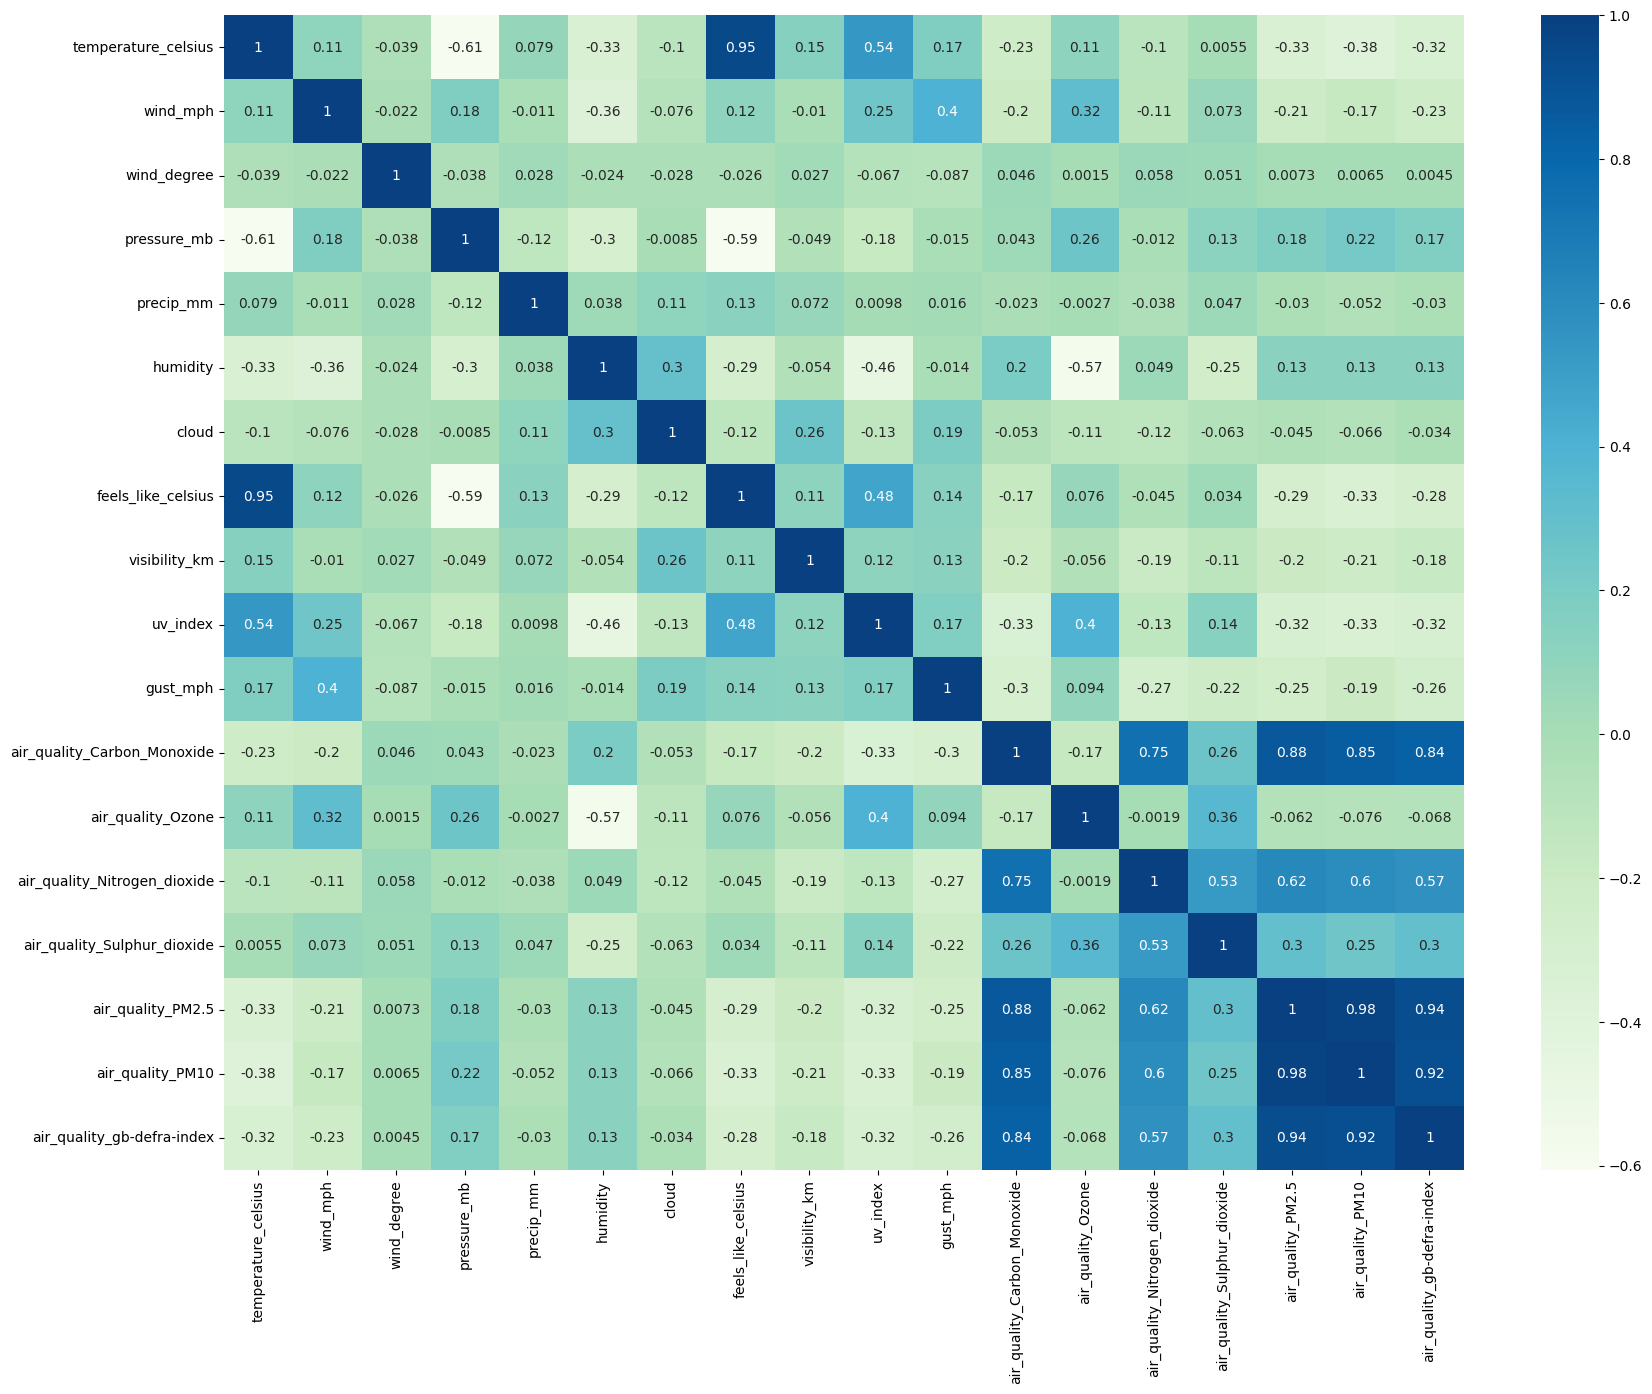

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(diff_countries[['temperature_celsius', 'wind_mph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_gb-defra-index']].corr(), annot=True, cmap='GnBu')

In [ ]:
# Counting instances in clusters
diff_countries['air_quality_gb-defra-index'].value_counts()

1     1528
2      172
10      73
3       68
4       20
5       14
6        9
8        4
9        4
7        3
Name: air_quality_gb-defra-index, dtype: int64

In [ ]:
# Counting instances in clusters
first_cluster['air_quality_gb-defra-index'].value_counts()

1     2018
2     1144
3      554
10     353
4      188
5      148
6      101
7       73
8       66
9       44
Name: air_quality_gb-defra-index, dtype: int64

In [ ]:
# Counting instances in clusters
second_cluster['air_quality_gb-defra-index'].value_counts()

1     5338
2     1025
3      424
10     382
4      125
5      107
6       61
8       50
9       38
7       36
Name: air_quality_gb-defra-index, dtype: int64

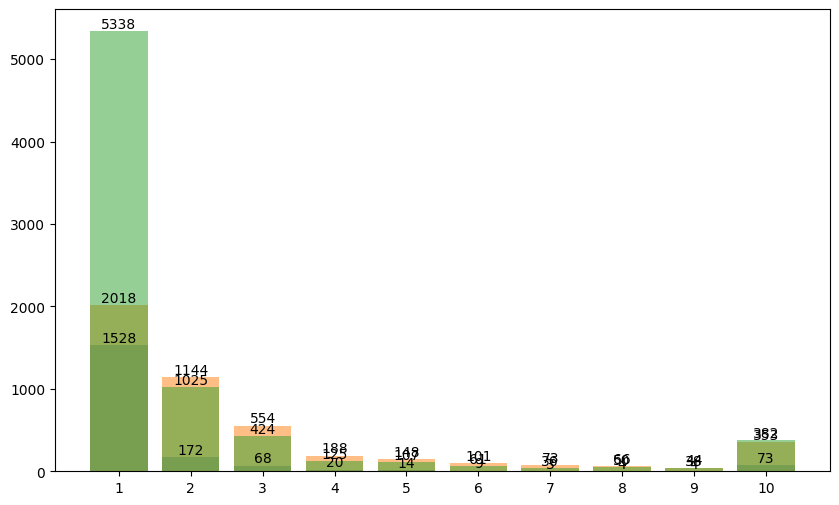

In [ ]:
# Calculate value counts
diff_countries_counts = diff_countries['air_quality_gb-defra-index'].value_counts()
first_cluster_counts = first_cluster['air_quality_gb-defra-index'].value_counts()
second_cluster_counts = second_cluster['air_quality_gb-defra-index'].value_counts()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the value counts
bars1 = plt.bar(diff_countries_counts.index, diff_countries_counts.values, label='diff_countries', alpha=0.5)
bars2 = plt.bar(first_cluster_counts.index, first_cluster_counts.values, label='first_cluster', alpha=0.5)
bars3 = plt.bar(second_cluster_counts.index, second_cluster_counts.values, label='second_cluster', alpha=0.5)

# Function to add value annotations on the bars
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Annotate value on each bar
annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)

plt.xticks(range(1, 11))

# Add a legend
plt.legend()

# Show the plot
plt.show()

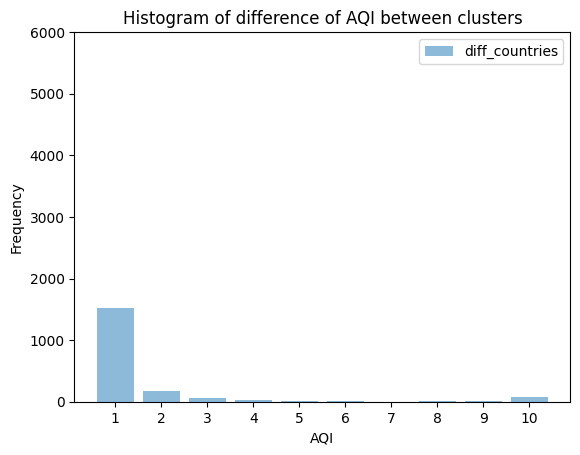

In [ ]:
plt.bar(diff_countries_counts.index, diff_countries_counts.values, label='diff_countries', alpha=0.5)
plt.title('Histogram of difference of AQI between clusters')
plt.legend()
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.ylim(0,6000);

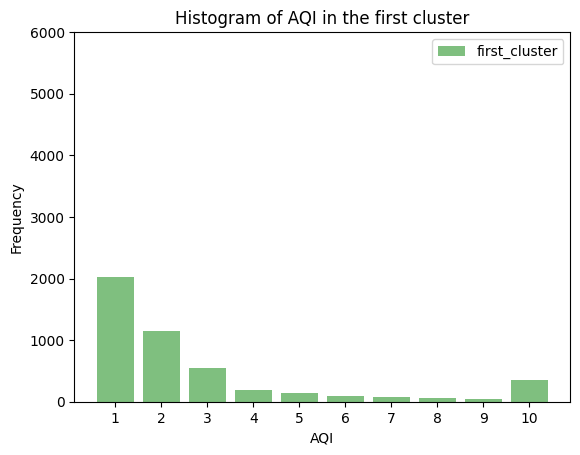

In [ ]:
plt.bar(first_cluster_counts.index, first_cluster_counts.values, label='first_cluster', alpha=0.5, color='green')
plt.title('Histogram of AQI in the first cluster')
plt.legend()
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.ylim(0,6000);

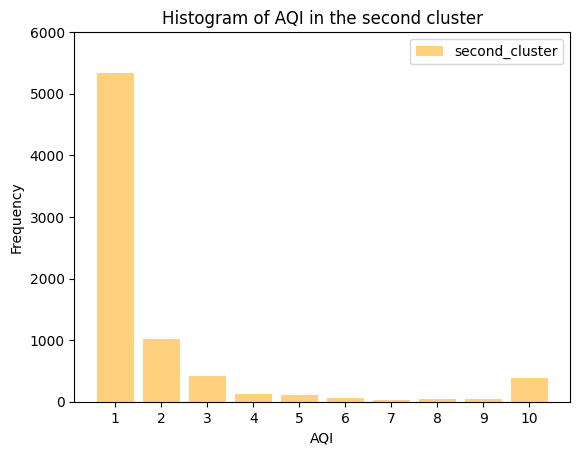

In [ ]:
plt.bar(second_cluster_counts.index, second_cluster_counts.values, label='second_cluster', alpha=0.5, color='orange')
plt.title('Histogram of AQI in the second cluster')
plt.legend()
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.ylim(0,6000);